In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [20]:
# Read age-specfic fertility rates and select the columns needed
asfr = pd.read_csv("/ihme/forecasting/data/fbd_scenarios_data/forecast/asfr/best/asfrdf.csv")\
         .loc[:, ['location_id', 'year_id', 'age_group_id', 'age_group_name', 'logit_asfr']]
asfr.head()

,location_id,year_id,age_group_id,age_group_name,logit_asfr
0,6,1980,8,15 to 19,-2.614075
1,7,1980,8,15 to 19,-3.868174
2,8,1980,8,15 to 19,-1.930093
3,10,1980,8,15 to 19,-0.826310
4,11,1980,8,15 to 19,-0.271292


In [21]:
# Pivot the dataframe(long to wide) so the year_id will be columns
asfr = pd.pivot_table(asfr,
                      values=['logit_asfr'],
                      index=['location_id', 'age_group_id', 'age_group_name'],
                      columns=['year_id'])
asfr.head()

logit_asfr                      \
year_id                                       1980      1981      1982   
location_id age_group_id age_group_name                                  
6           8            15 to 19        -2.614075 -2.559895 -2.509249   
            9            20 to 24         0.225306  0.281881  0.333448   
            10           25 to 29        -0.310090 -0.296898 -0.290428   
            11           30 to 34        -1.498920 -1.702460 -1.914440   
            12           35 to 39        -2.421943 -2.691201 -2.979394   

                                                                       \
year_id                                      1983      1984      1985   
location_id age_group_id age_group_name                                 
6           8            15 to 19       -2.488954 -2.473146 -2.460501   
            9            20 to 24        0.331773  0.321367  0.305010   
            10           25 to 29       -0.393886 -0.502817 -0.614610   
            11           30 to 34       -1.924862 -1.941385 -1.961974   
            12           35 to 39       -3.006959 -3.040642 -3.078692   

                                                                       \
year_id                                      1986      1987      1988   
location_id age_group_id age_group_name                                 
6           8            15 to 19       -2.451448 -2.450313 -2.499506   
            9            20 to 24        0.281885  0.243936  0.133740   
            10           25 to 29       -0.730116 -0.857101 -0.893336   
            11           30 to 34       -1.987116 -2.022715 -2.101921   
            12           35 to 39       -3.121695 -3.175553 -3.394321   

                                                     ...               \
year_id                                      1989    ...         2007   
location_id age_group_id age_group_name              ...                
6           8            15 to 19       -2.557809    ...    -3.946156   
            9            20 to 24        0.013878    ...    -0.848605   
            10           25 to 29       -0.944489    ...    -1.923296   
            11           30 to 34       -2.195170    ...    -3.177541   
            12           35 to 39       -3.646576    ...    -5.226718   

                                                                       \
year_id                                      2008      2009      2010   
location_id age_group_id age_group_name                                 
6           8            15 to 19       -3.995407 -4.053159 -4.116519   
            9            20 to 24       -0.879500 -0.917234 -0.958689   
            10           25 to 29       -1.970442 -2.029434 -2.096063   
            11           30 to 34       -3.214447 -3.263037 -3.319032   
            12           35 to 39       -5.232526 -5.258358 -5.294411   

                                                                       \
year_id                                      2011      2012      2013   
location_id age_group_id age_group_name                                 
6           8            15 to 19       -4.179010 -4.240479 -4.315916   
            9            20 to 24       -0.997761 -1.034438 -1.091142   
            10           25 to 29       -2.160637 -2.223167 -2.265657   
            11           30 to 34       -3.374331 -3.429910 -3.476531   
            12           35 to 39       -5.324008 -5.350754 -5.323266   

                                                                       
year_id                                      2014      2015      2016  
location_id age_group_id age_group_name                                
6           8            15 to 19       -4.395975 -4.482489 -4.556531  
            9            20 to 24       -1.148873 -1.208512 -1.256584  
            10           25 to 29       -2.311952 -2.364258 -2.395475  
            11           30 to 34       -3.529217 -3.590212 -3.628516  
            12    

In [22]:
# Clean the column names and indexes
colnames = []
for i, a in enumerate(asfr.columns.get_level_values(1)):
    colnames.append(str(a))

asfr.columns = colnames
for col in asfr.columns:
    asfr = asfr.rename(columns={col: col.strip('_')})
asfr = asfr.reset_index()
asfr.head()

,location_id,age_group_id,age_group_name,1980,1981,1982,1983,1984,1985,1986,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,6,8,15 to 19,-2.614075,-2.559895,-2.509249,-2.488954,-2.473146,-2.460501,-2.451448,...,-3.946156,-3.995407,-4.053159,-4.116519,-4.179010,-4.240479,-4.315916,-4.395975,-4.482489,-4.556531
1,6,9,20 to 24,0.225306,0.281881,0.333448,0.331773,0.321367,0.305010,0.281885,...,-0.848605,-0.879500,-0.917234,-0.958689,-0.997761,-1.034438,-1.091142,-1.148873,-1.208512,-1.256584
2,6,10,25 to 29,-0.310090,-0.296898,-0.290428,-0.393886,-0.502817,-0.614610,-0.730116,...,-1.923296,-1.970442,-2.029434,-2.096063,-2.160637,-2.223167,-2.265657,-2.311952,-2.364258,-2.395475
3,6,11,30 to 34,-1.498920,-1.702460,-1.914440,-1.924862,-1.941385,-1.961974,-1.987116,...,-3.177541,-3.214447,-3.263037,-3.319032,-3.374331,-3.429910,-3.476531,-3.529217,-3.590212,-3.628516
4,6,12,35 to 39,-2.421943,-2.691201,-2.979394,-3.006959,-3.040642,-3.078692,-3.121695,...,-5.226718,-5.232526,-5.258358,-5.294411,-5.324008,-5.350754,-5.323266,-5.303547,-5.295379,-5.247486


In [23]:
# Grab data of year t, and t+5 from 1980 through 2016 and combine them in a dataframe.
lst = []
for age in np.arange(8, 14):
    tmp = asfr.loc[asfr.age_group_id.isin([age, age+1])]
    for year in np.arange(1980, 2016-5):
        s1 = tmp.groupby(['location_id'])['{}'.format(year)].shift(0)
        # Shift the column year+5
        s2 = tmp.groupby(['location_id'])['{}'.format(year+5)].shift(-1)
        s = pd.concat([s1, s2], axis=1).dropna()
        s = s.rename(columns={'{}'.format(year): 't-1', '{}'.format(year+5): 't'})
        # Decade of the year; so 1988 will be 1980, 1994 will be 1990
        s['decade'] = int(round(year / 10) * 10)
        age_group_name = tmp.loc[tmp.age_group_id == age+1, 'age_group_name'].values[0]
        s.loc[:, 'age_group_name'] = age_group_name
        s.loc[:, 'age_group_id'] = age + 1
        lst.append(s)
df = pd.concat(lst)
df.head()

,t-1,t,decade,age_group_name,age_group_id
0,-2.614075,0.305010,1980,20 to 24,9
7,-3.868174,-0.227115,1980,20 to 24,9
14,-1.930093,-0.907807,1980,20 to 24,9
21,-0.826310,0.131564,1980,20 to 24,9
28,-0.271292,0.060307,1980,20 to 24,9


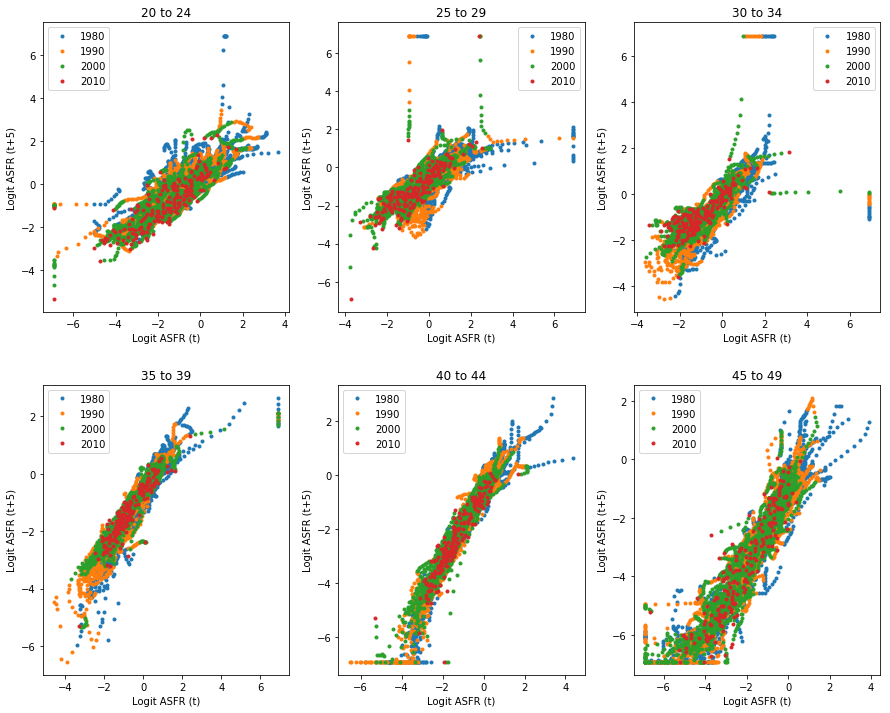

In [24]:
# Plot the scatterplot of ASFR in year t against year t+5 by age groups, differentiated by the decades.
nrow = 2
ncol = 3
fig = plt.figure(figsize=(15, 12))
grid = gridspec.GridSpec(nrow, ncol)

for ix, age in enumerate(xrange(8, 14)):
    ax = fig.add_subplot(grid[ix])
    tmp = df.loc[df.age_group_id == age+1]
    age_group_name = tmp.age_group_name.unique()[0]
    groups = tmp.groupby('decade')
    for name, group in groups:
        ax.plot(group['t-1'], group['t'], marker='o', linestyle='', ms=3, label=name)
    ax.legend()
    ax.set_xlabel("Logit ASFR (t)")
    ax.set_ylabel("Logit ASFR (t+5)")
    ax.title.set_text(age_group_name)
plt.subplots_adjust(hspace=0.25)